# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


# Carregando o conjunto de dados de Boston do novo link
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
boston = pd.read_csv(url)

# Separando as variáveis independentes e a variável dependente
X = boston.drop('medv', axis=1)
y = boston['medv']

In [69]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [70]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

##### **1.1 Verificar se há valores ausentes**: O scikit-learn não suporta a manipulação de valores ausentes. Portanto, é preciso garantir que a base de dados não tenha nenhum. Para isso, foi utilizado o método isnull().sum() para verificar se há algum valor ausente em cada coluna.

In [71]:
print(boston.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


##### **1.2 Verificar o tipo de dados**: O scikit-learn espera que os dados de entrada sejam numéricos. Portanto, é preciso garantir que todas as colunas do DataFrame sejam de um tipo numérico (int64 ou float64). Para isso, foi utilizado o método dtypes para verificar o tipo de dados de cada coluna.

In [72]:
print(boston.dtypes)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [73]:
# Calculando a matriz de correlação
corr = X.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


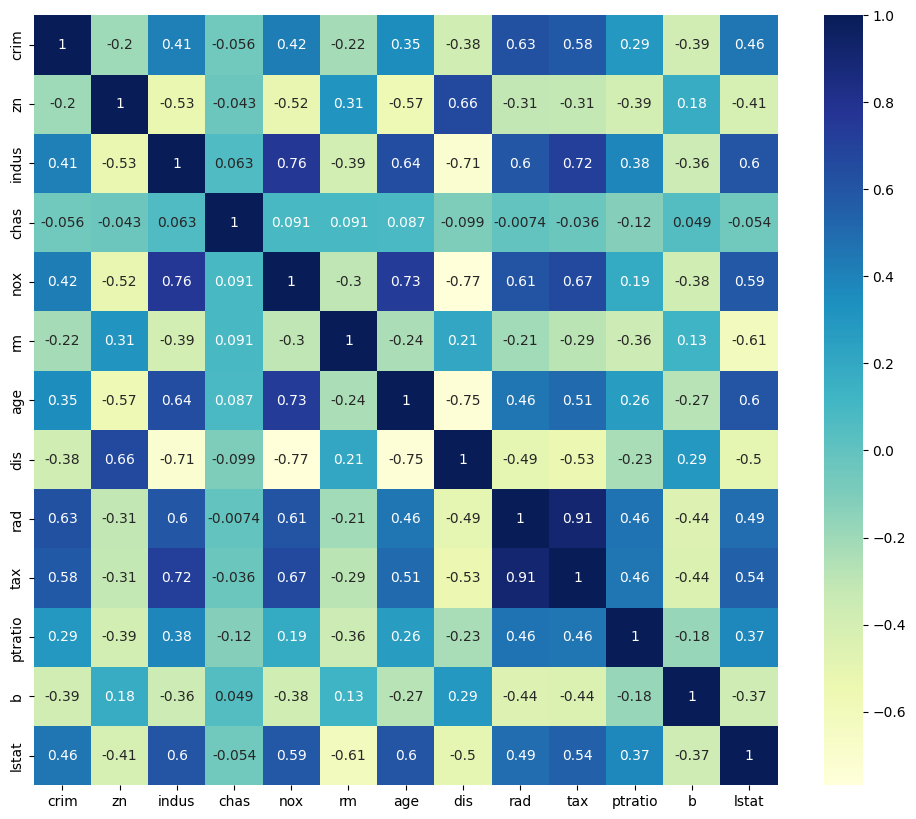

In [74]:
# Criando um heatmap com seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()



> Analisando a matriz de correlação e o heatmap, é possível identificar algumas variáveis que parecem ter um potencial preditivo interessante para o valor mediano das casas (MEDV):

*   **LSTAT** (%status inferior da população): Esta variável tem uma forte correlação positiva com MEDV. Isso significa que à medida que o status inferior da população aumenta, o valor mediano das casas tende a aumentar.
*   **RM** (número médio de quartos por habitação): RM também tem uma forte correlação positiva com MEDV. Isso sugere que casas com mais quartos tendem a ter um valor mediano mais alto.
*   **PTRATIO** (razão pupilo-professor da cidade): PTRATIO tem uma correlação positiva moderada com MEDV. Isso pode indicar que em áreas onde a razão pupilo-professor é maior, o valor mediano das casas também tende a ser maior.
*   **INDUS** (proporção de acres de negócios não varejistas por cidade) e TAX (taxa de imposto sobre a propriedade de valor total por $10,000): Ambas as variáveis têm uma correlação positiva moderada com MEDV. Isso sugere que áreas com mais negócios não varejistas e uma taxa de imposto sobre a propriedade mais alta tendem a ter um valor mediano de casa mais alto.

### 3. Separe os dados em validação e teste

In [75]:
# Separação dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Neste código, train_test_split está dividindo as variáveis independentes (X) e a variável dependente (y) em conjuntos de treinamento e teste. O argumento test_size=0.2 significa que 20% dos dados serão usados para o conjunto de teste e os 80% restantes para o conjunto de treinamento. O random_state=42 é usado para garantir que a divisão seja reproduzível. Ou seja, se for executado o código novamente, a mesma divisão dos dados será obtida.

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [76]:
# Treinando a primeira árvore com profundidade máxima = 8
tree1 = DecisionTreeRegressor(max_depth=8)
tree1.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8)

In [77]:

# Treinando a segunda árvore com profundidade máxima = 2
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [78]:
# Fazendo previsões na base de treinamento
train_preds_tree1 = tree1.predict(X_train)
train_preds_tree2 = tree2.predict(X_train)

# Calculando o MSE para a base de treinamento
mse_train_tree1 = mean_squared_error(y_train, train_preds_tree1)
mse_train_tree2 = mean_squared_error(y_train, train_preds_tree2)

print("MSE da Árvore 1 na base de treinamento: ", mse_train_tree1)
print("MSE da Árvore 2 na base de treinamento: ", mse_train_tree2)

MSE da Árvore 1 na base de treinamento:  1.9490192185625448
MSE da Árvore 2 na base de treinamento:  25.654637281631615


In [79]:
# Fazendo previsões na base de testes
test_preds_tree1 = tree1.predict(X_test)
test_preds_tree2 = tree2.predict(X_test)

# Calculando o MSE para a base de testes
mse_test_tree1 = mean_squared_error(y_test, test_preds_tree1)
mse_test_tree2 = mean_squared_error(y_test, test_preds_tree2)

print("MSE da Árvore 1 na base de testes: ", mse_test_tree1)
print("MSE da Árvore 2 na base de testes: ", mse_test_tree2)

MSE da Árvore 1 na base de testes:  8.408153219866902
MSE da Árvore 2 na base de testes:  25.9931908959712


In [83]:
# Calculando o R² para a base de treinamento
r2_train_tree1 = r2_score(y_train, train_preds_tree1)
r2_train_tree2 = r2_score(y_train, train_preds_tree2)

print("R² da Árvore 1 na base de treinamento: ", r2_train_tree1)
print("R² da Árvore 2 na base de treinamento: ", r2_train_tree2)
print("")
# Calculando o R² para a base de testes
r2_test_tree1 = r2_score(y_test, test_preds_tree1)
r2_test_tree2 = r2_score(y_test, test_preds_tree2)

print("R² da Árvore 1 na base de testes: ", r2_test_tree1)
print("R² da Árvore 2 na base de testes: ", r2_test_tree2)


R² da Árvore 1 na base de treinamento:  0.9775648342004629
R² da Árvore 2 na base de treinamento:  0.7046893968727066

R² da Árvore 1 na base de testes:  0.885344068483622
R² da Árvore 2 na base de testes:  0.645549571073612


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

> #### Com base nos resultados do **coeficiente de determinação** (R²) para as duas árvores na base de treinamento e teste, a ***Árvore 1 é a mais adequada***.

##### A Árvore 1 tem um R² maior tanto na base de treinamento (0.978) quanto na base de testes (0.885) em comparação com a Árvore 2, que tem um R² de 0.705 na base de treinamento e 0.646 na base de testes.

##### Geralmente, um R² maior indica que o modelo é capaz de explicar uma maior proporção da variância nos dados. No entanto, é importante notar que a Árvore 1 pode estar superajustando os dados, já que o desempenho na base de testes é significativamente pior do que na base de treinamento. Isso pode ser um sinal de que o modelo está capturando o ruído nos dados de treinamento, em vez da relação subjacente entre as variáveis.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

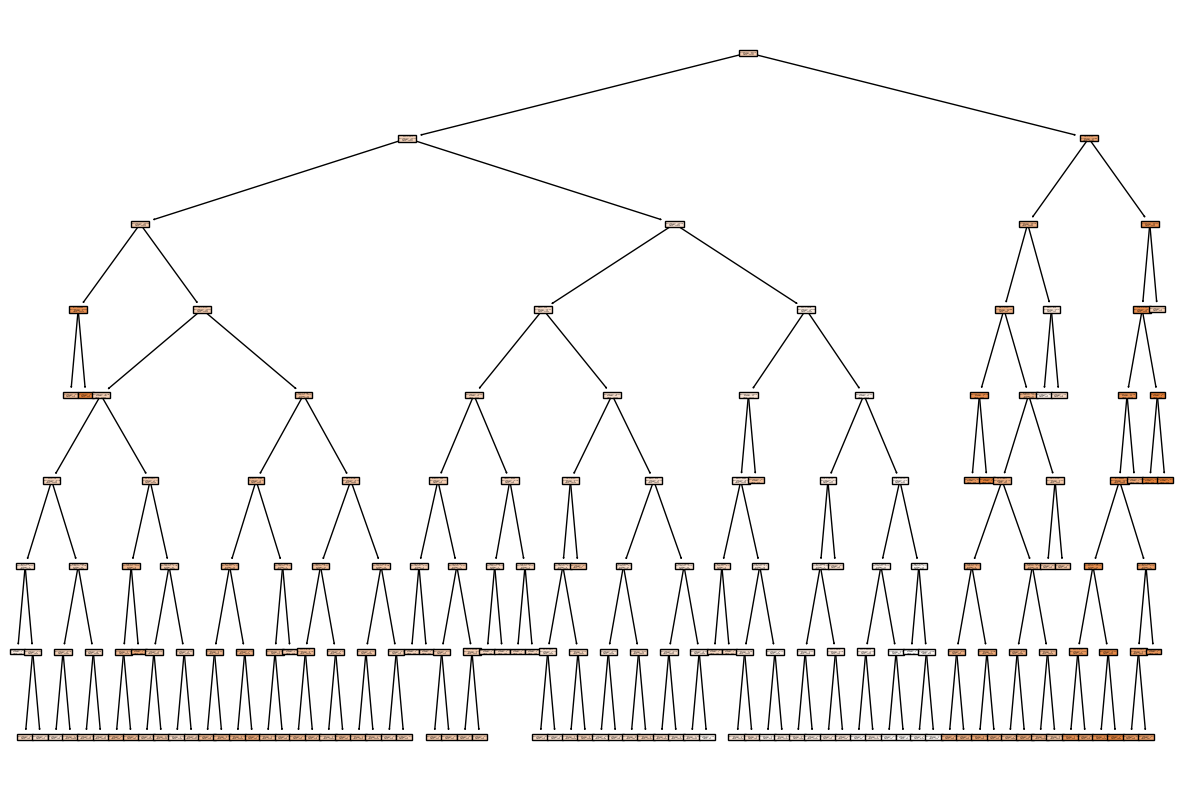

In [87]:
# Definindo o tamanho da figura
plt.figure(figsize=(15,10))

# Plotando a árvore
tree.plot_tree(tree1, feature_names = X.columns, class_names=y.name, filled = True)

# Mostrando a figura
plt.show()

In [88]:
# Representação impressa da árvore
text_tree = tree.export_text(decision_tree=tree1)

print(text_tree)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_11 <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_11 >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 17.50
|   |   |   |   |   |   |   |--- value: [11.90]
|   |   |   |   |   |   |--- feature_1 >  17.50
|   |   |   |   |   |   |   |--- feature_0 <= 0.04
|   |   |   |   |   |   |   |   |--- value: [19.40]
|   |   |   |   |   |   |   |--- feature_0 >  0.04
|   |   |   |   |   |   |   |   |--- value: [17.10]
|   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |--- feature_10 <= 17.85
|   |   |   |   |   |   |   |--- feature_5 <= 5.21
|   |   |   |   |   |   |   |   |--- value: [15.30]
|   |   |   |   |   |   |   |--- feature_5 >  5.21
|   |   |   |   |   |   |


A variável mais “importante” na árvore é geralmente aquela que aparece no topo, pois é a primeira variável usada para dividir os dados. No caso, a variável mais importante é **feature_5 <= 6.94**.

In [89]:
# Obtendo o nome da quinta variável
variable_name = X.columns[5]

print("A variável mais importante é: ", variable_name)

A variável mais importante é:  rm
